In [1]:
import numpy as np

data= np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils.np_utils import normalize
from keras.layers import Concatenate
from keras import Input
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.layers import Embedding


from keras.layers import  Conv1D, SpatialDropout1D, MaxPooling1D,AveragePooling1D, merge


model = Sequential()


model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=256,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       295040    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        7

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [4]:
checkpoint = ModelCheckpoint('weights/model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
49/49 [==============================] - 87s 174ms/step - loss: 0.6093 - accuracy: 0.6776 - val_loss: 0.5921 - val_accuracy: 0.6994
Epoch 2/20
49/49 [==============================] - 5s 112ms/step - loss: 0.4910 - accuracy: 0.7549 - val_loss: 0.3217 - val_accuracy: 0.6994
Epoch 3/20
49/49 [==============================] - 5s 112ms/step - loss: 0.2859 - accuracy: 0.8200 - val_loss: 0.2140 - val_accuracy: 0.9711
Epoch 4/20
49/49 [==============================] - 6s 112ms/step - loss: 0.1795 - accuracy: 0.9547 - val_loss: 0.1195 - val_accuracy: 0.9653
Epoch 5/20
49/49 [==============================] - 5s 112ms/step - loss: 0.1142 - accuracy: 0.9683 - val_loss: 0.0840 - val_accuracy: 0.9711
Epoch 6/20
49/49 [==============================] - 5s 112ms/step - loss: 0.0750 - accuracy: 0.9812 - val_loss: 0.0758 - val_accuracy: 0.9711
Epoch 7/20
49/49 [==============================] - 5s 112ms/step - loss: 0.0765 - accuracy: 0.9761 - val_loss: 0.1049 - val_accuracy: 0.9711
Epoch

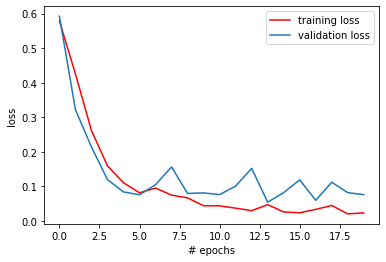

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

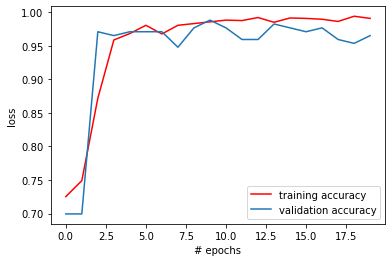

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

14/14 [==============================] - 1s 88ms/step - loss: 0.0578 - accuracy: 0.9838
[0.057820554822683334, 0.9837962985038757]


In [8]:
import numpy as np
pred=np.round(model.predict(test_data),0)
print(pred)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_target.argmax(axis=1), pred.argmax(axis=1)))



[[131   4]
 [  3 294]]


In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
name=['Covid','Normal']
classification_metrics=metrics.classification_report(test_target, pred,target_names=name)
print(classification_metrics)

              precision    recall  f1-score   support

       Covid       0.98      0.97      0.97       135
      Normal       0.99      0.99      0.99       297

   micro avg       0.98      0.98      0.98       432
   macro avg       0.98      0.98      0.98       432
weighted avg       0.98      0.98      0.98       432
 samples avg       0.98      0.98      0.98       432

